In [143]:
import geopandas as gpd
import matplotlib.pyplot as plt
import json
import plotly.express as px
import pandas as pd
import numpy as np
import folium
import re
import shapely
import plotly.graph_objects as go

In [144]:
PARLIMEN_URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/electoral_0_parlimen.geojson"
DUN_URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/electoral_1_dun.geojson"
DISTRICT_URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_2_district.geojson"
STATE_URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_1_state.geojson"

In [145]:
def scatter_state(state_geo, f_geo):
    fig, ax = plt.subplots()
    ax.axis('off')

    state_geo.plot(ax=ax, edgecolor="black", linewidth=1,color="white")
    f_geo.plot(ax=ax, color="red", legend=True, alpha=0.4)
    return fig

In [146]:
state_geo = gpd.read_file(STATE_URL)

In [147]:
from utils.scraper import get_kfc, get_pizza_hut, get_mcd, get_dominos

In [148]:
kfc = get_kfc()[['address', 'gesStoreId','lat', 'locationId','long', 'name', 'state']]
kfc_geo = gpd.GeoDataFrame(kfc, geometry=gpd.points_from_xy(kfc.long, kfc.lat))

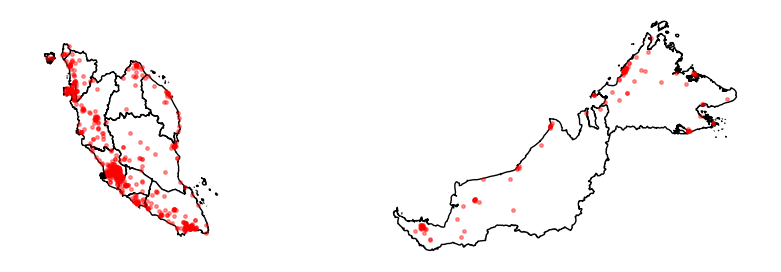

In [149]:
fig = scatter_state(state_geo, kfc_geo)

In [150]:
fig.savefig("kfc.svg", bbox_inches='tight', dpi=400)

In [151]:
mcd = get_mcd()[["name", "lat", "lng"]]
mcd_geo = gpd.GeoDataFrame(mcd, geometry=gpd.points_from_xy(mcd.lng, mcd.lat))

In [152]:
mcd_geo.query('''name == "McDonald's KK Airport"''')

,name,lat,lng,geometry
102,McDonald's KK Airport,5.923602,110.050620,POINT (110.05062 5.92360)


In [153]:
mcd_geo.loc[102, "geometry"] = shapely.geometry.Point(116.05087577541953, 5.92294369173068)

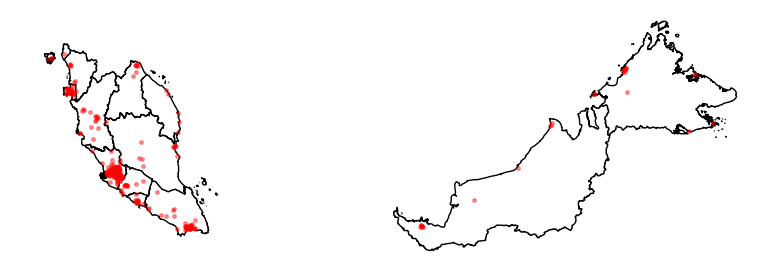

In [154]:
fig = scatter_state(state_geo, mcd_geo)

In [155]:
fig.savefig("mcd.svg", bbox_inches='tight', dpi=400)

In [156]:
pizza_hut = get_pizza_hut()[["id", "name", "lat", "long"]]
pizza_hut_geo = gpd.GeoDataFrame(pizza_hut, geometry=gpd.points_from_xy(pizza_hut.long, pizza_hut.lat))

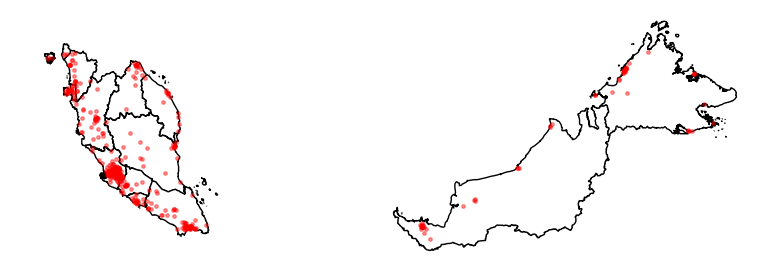

In [157]:
fig = scatter_state(state_geo, pizza_hut_geo)

In [158]:
fig.savefig("pzhut.svg", bbox_inches='tight', dpi=400)

In [159]:
dominos = get_dominos()[["StoreName", "Latitude", "Longitude"]]
dominos_geo = gpd.GeoDataFrame(dominos, geometry=gpd.points_from_xy(dominos.Longitude, dominos.Latitude))

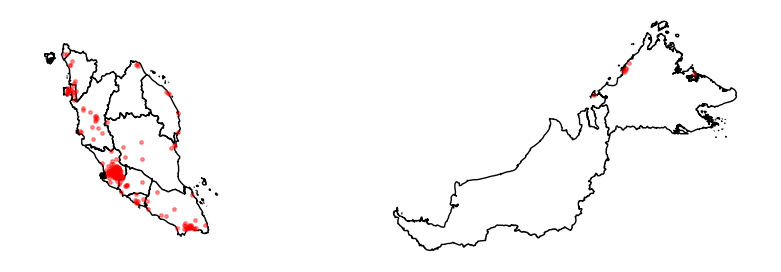

In [160]:
fig = scatter_state(state_geo, dominos_geo)

In [161]:
fig.savefig("dom.svg", bbox_inches='tight', dpi=400)